## Pembuka

Assalamu'alaikum warahmatullahi wabarakatuh.
Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan Rahmat dan HidayahNya kepada kita semua.
Sholawat serta salam senantiasa tercurah limpahkan kepada baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan kesembilan Program Training **Algoritma Machine Learning** Kelas Mahir.

Pada pertemuan ini kamu akan belajar:
* K Means Clustering
* Algoritma K Means Clustering
* Contoh K Means Clustering
* Fungsi K Means Clustering
* K Means Clustering dengan Scikit Learn

## K Means Clustering

K-means (MacQueen, 1967) adalah salah satu algoritma pembelajaran tanpa pengawasan paling sederhana yang memecahkan masalah pengelompokan yang terkenal. Prosedurnya mengikuti cara sederhana dan mudah untuk mengklasifikasikan kumpulan data yang diberikan melalui sejumlah cluster tertentu (asumsikan k cluster) tetap secara apriori. Ide utamanya adalah mendefinisikan k centroid, satu untuk setiap cluster. Centroid ini harus ditempatkan dengan cara yang licik karena lokasi yang berbeda menyebabkan hasil yang berbeda. Jadi, pilihan yang lebih baik adalah menempatkan mereka sejauh mungkin dari satu sama lain. Langkah selanjutnya adalah mengambil setiap titik milik kumpulan data yang diberikan dan mengaitkannya ke centroid terdekat. Ketika tidak ada poin yang tertunda, langkah pertama selesai dan pengelompokan awal dilakukan. Pada titik ini kita perlu menghitung ulang k centroid baru sebagai barycenter dari cluster yang dihasilkan dari langkah sebelumnya. Setelah kita memiliki k centroid baru ini, pengikatan baru harus dilakukan antara titik set data yang sama dan centroid baru terdekat. Sebuah loop telah dibuat. Sebagai hasil dari loop ini kita dapat melihat bahwa k centroid mengubah lokasinya langkah demi langkah sampai tidak ada lagi perubahan yang dilakukan. Dengan kata lain centroid tidak bergerak lagi.
Terakhir, algoritma ini bertujuan untuk meminimalkan fungsi tujuan, dalam hal ini fungsi kesalahan kuadrat. Fungsi tujuan

$$J=\sum \limits_{j=1} ^{k} \sum \limits_{i=1} ^{n} \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} $$

di mana $ \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} $ adalah ukuran jarak yang dipilih antara titik data $ x_{i} ^{(j )} $ dan pusat cluster $c_{j}$, merupakan indikator jarak n titik data dari masing-masing pusat cluster.


## Algoritma K-Means Clustering
1. Tentukan parameter k
2. Tentukan pusat cluster awal secara acak
3. Hitung jarak setiap data ke pusat cluster
4. Tetapkan cluster data berdasarkan pusat cluster terdekat
5. Memperbarui pusat cluster dengan menghitung nilai rata-rata setiap cluster
6. Ulangi langkah 3-5 sampai kriteria berhenti terpenuhi:
     1. Jumlah iterasi tertentu tercapai, ATAU
     2. Tidak ada (atau minimal) perbedaan anggota cluster pada dua iterasi terakhir, OR
     3. Tidak ada (atau minimum) perbedaan pusat cluster, ATAU
     4. Selisih SSE (Sum of Squared Error) minimum


## Contoh Implementasi K Means

**0. Dataset**

| $$x_1$$ | $$x_2$$ |
| :---: | :---: |
|   1   |   1   |
|   2   |   3   |
|   7   |   8   |
|   8   |   8   |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.DataFrame({"x1":[1,2,7,8], "x2":[1,3,8,8]})
data

,x1,x2
0,1,1
1,2,3
2,7,8
3,8,8


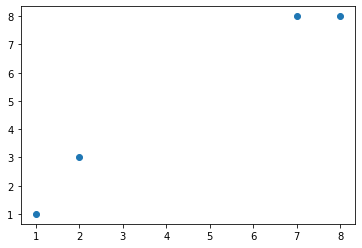

In [3]:
plt.scatter(data.x1, data.x2)

**1. Tentukan parameternya $k$**

$$k=2$$

In [4]:
k=2

**2. Tentukan pusat cluster awal secara acak**

|Centroid | $$x_1$$ | $$x_2$$ |
| :---:   | :---: | :---: |
| $$c_1$$ |   1   |   1   |
| $$c_2$$ |   2   |   3   |

In [5]:
pusat_klaster = np.array([[1,1],[2,3]])
pusat_klaster

array([[1, 1],
       [2, 3]])

In [6]:
# Determine the initial cluster center randomly
import random
def pusat_klaster_awal(k, data):
    X=np.array(data)
    n=len(X)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1, k=k)
    pusat_klaster=X[pusat_klaster_index]
    return pusat_klaster

**3. Hitung jarak setiap data ke pusat cluster**

In [7]:
# Define the euclidean distance function
def jarak_euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

In [8]:
def jarak_centroid_euclidean(data,pusat_klaster):
    n=len(data)
    k=np.array(pusat_klaster).shape[0]
    jarak=[]
    for i in range(n):
        x = list(data.iloc[i,::])
        jrk = [jarak_euclidean(x, pusat_klaster[j]) for j in range(k)]
        jarak.append(jrk)
    return jarak

In [9]:
jarak_centroid=jarak_centroid_euclidean(data,pusat_klaster)
jarak_centroid

[[0.0, 2.23606797749979],
 [2.23606797749979, 0.0],
 [9.219544457292887, 7.0710678118654755],
 [9.899494936611665, 7.810249675906654]]

**4. Tetapkan klaster data berdasarkan pusat klaster terdekat**

In [10]:
def menentukan_klaster(jarak_centroid):
    n=len(jarak_centroid)
    label_klaster=list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
    return label_klaster

In [11]:
klaster=menentukan_klaster(jarak_centroid)
klaster

[0, 1, 1, 1]

**5. Memperbarui pusat cluster dengan menghitung nilai rata-rata setiap cluster**

In [12]:
def menghitung_pusat_klaster(data, klaster):
    data['label']=klaster
    pusat_barudf=data.groupby('label', as_index=False).mean()
    pusat_barudf=pusat_barudf.iloc[::,1:]
    pusat_klaster_baru=np.array(pusat_barudf)
    return pusat_klaster_baru

In [13]:
pusat_klaster_baru=menghitung_pusat_klaster(data, klaster)
pusat_klaster_baru

array([[1.        , 1.        ],
       [5.66666667, 6.33333333]])

**6. Ulangi langkah 2 - 5 hingga kriteria henti dipenuhi:**

In [14]:
def perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru):
    perubahan = 0
    for a,b in zip(pusat_klaster_lama, pusat_klaster_baru):
        perubahan+=jarak_euclidean(a,b)
    return perubahan

In [15]:
perubahan_pusat_klaster_euclidean(pusat_klaster, pusat_klaster_baru)

4.955356249106169

## Fungsi K Means Clustering

In [16]:
def plot_klaster(X, klaster, pusat_klaster):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=klaster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(pusat_klaster[:, 0], pusat_klaster[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [32]:
def k_means(k, df):
    X=np.array(df)
    pusat_klaster_lama = pusat_klaster_awal(k, X)
    klaster = [0]*len(X)
    epsilon = 100
    iterasi = -1
    while epsilon>.001:
        jarak_ke_pusat_klaster=jarak_centroid_euclidean(df,pusat_klaster_lama)
        klaster = menentukan_klaster(jarak_ke_pusat_klaster)
        plot_klaster(X, klaster, pusat_klaster_lama)
        pusat_klaster_baru = menghitung_pusat_klaster(df, klaster)
        epsilon = perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru)
        pusat_klaster_lama = pusat_klaster_baru
        iterasi += 1
    return iterasi, klaster, pusat_klaster_baru

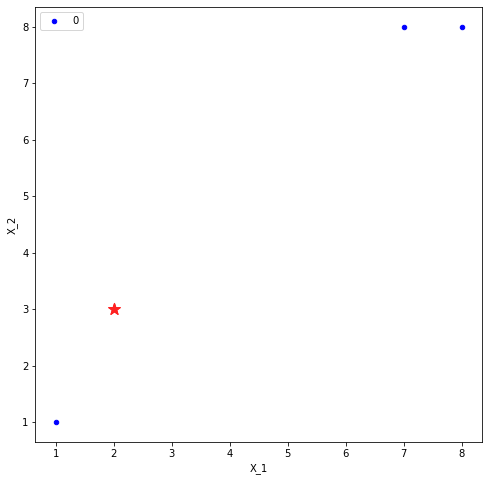

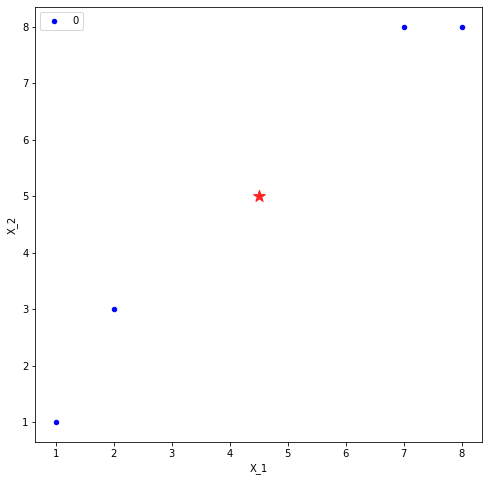

In [18]:
iterasi, klaster, pusat_klaster= k_means(2, data)

In [19]:
pusat_klaster

array([[4.5, 5. ]])

## K-Means Clustering menggunakan Python Scikit Learn

In [20]:
from sklearn.cluster import KMeans
import numpy as np

data=pd.DataFrame({"x1":[1,2,7,8], "x2":[1,3,8,8]})

X=np.array(data)
X

array([[1, 1],
       [2, 3],
       [7, 8],
       [8, 8]])

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [22]:
kmeans.labels_

array([0, 0, 1, 1], dtype=int32)

In [23]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 1], dtype=int32)

In [24]:
kmeans.cluster_centers_

array([[1.5, 2. ],
       [7.5, 8. ]])

## Latihan

Diberikan Dataset

In [ ]:
data=pd.DataFrame({"Province Name":["Jakarta", "Jawa Tengah", "Bali", "Sumatera Selatan", "Kalimantan Timur", "Maluku"], 
                   "Confirmed":[1231, 1452, 789, 201, 78, 45], 
                   "Death":[10, 35, 8, 2, 1, 0]})
data_used=data[["Confirmed", "Death"]]
data_used

,Confirmed,Death
0,1231,10
1,1452,35
2,789,8
3,201,2
4,78,1
5,45,0


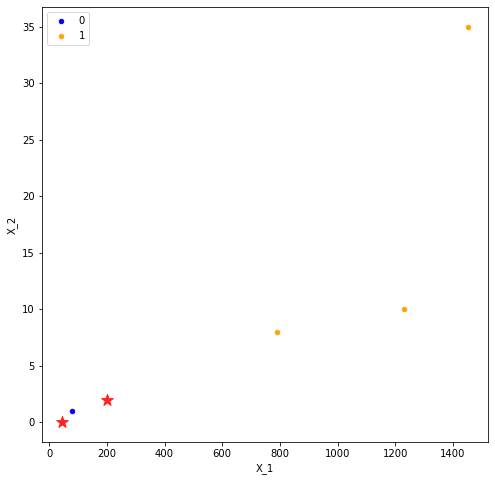

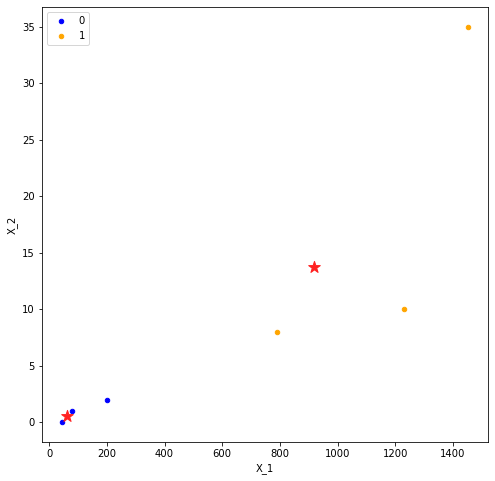

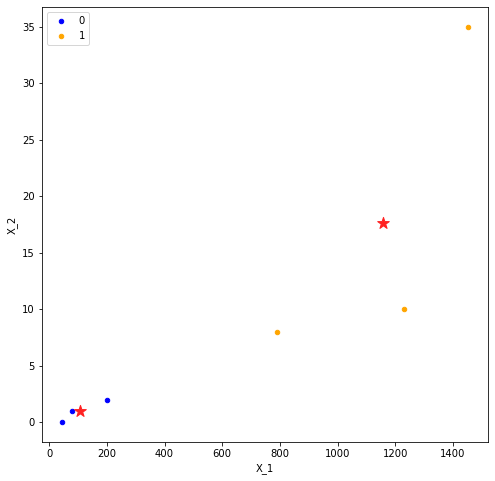

In [ ]:
# Cluster the dataset above using K Means clustering into 2 cluster.
iterasi, klaster, pusat_klaster= k_means(2, data_used)

# **Tugas 7 dan 8**

**Import Library**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Dataset**

In [35]:
data=pd.read_csv('https://github.com/TyasArgani/PSDS-Kelas-Mahir/raw/main/Super-Store-Dataset.csv')
data.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164


**Kolom yang akan diklasterisasi menggunakan metode K Means Clustering**

In [36]:
data_used=data[['sales','quantity','profit']]
data_used

,sales,quantity,profit
0,261.9600,2,41.9136
1,731.9400,3,219.5820
2,14.6200,2,6.8714
3,957.5775,5,-383.0310
4,22.3680,2,2.5164
...,...,...,...
9983,25.2480,3,4.1028
9984,91.9600,2,15.6332
9985,258.5760,2,19.3932
9986,29.6000,4,13.3200


**Menggunakan metode elbow untuk menentukan angka cluster yang tepat**

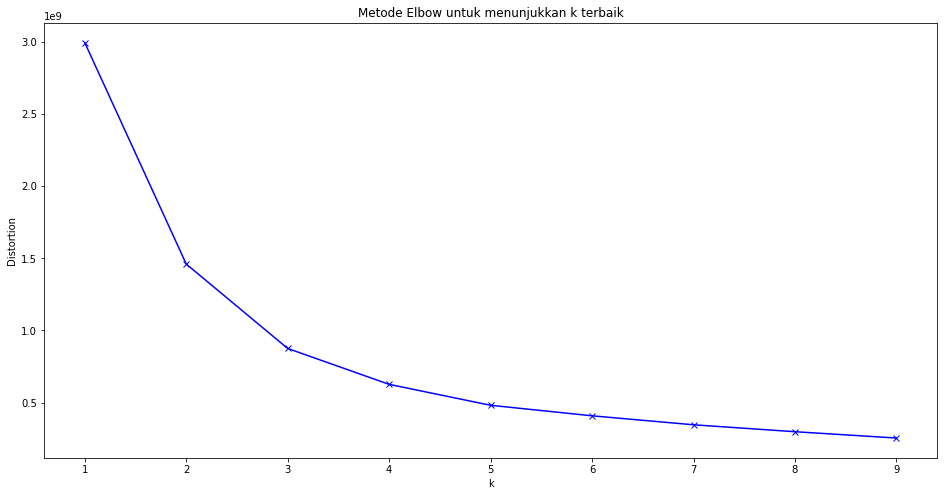

In [37]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_used)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Metode Elbow untuk menunjukkan k terbaik')
plt.show()

karena titik 3 membentuk siku, maka titik tersebut merupakan jumlah klaster terbaik.

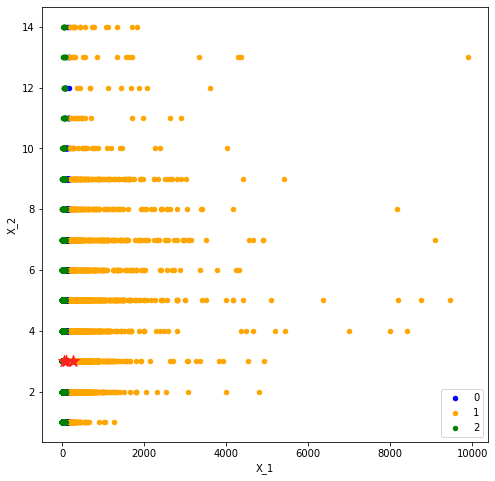

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


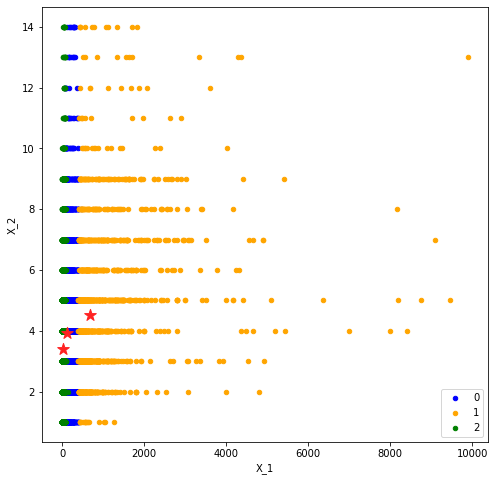

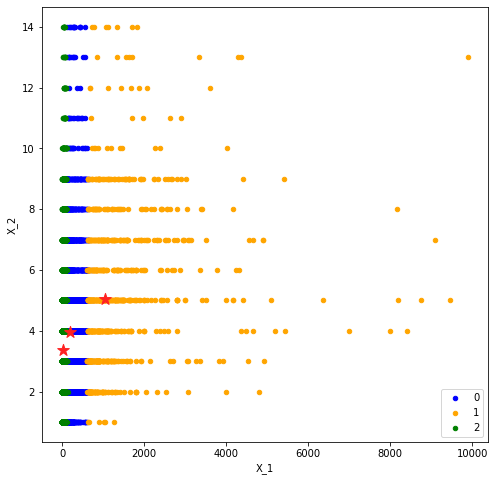

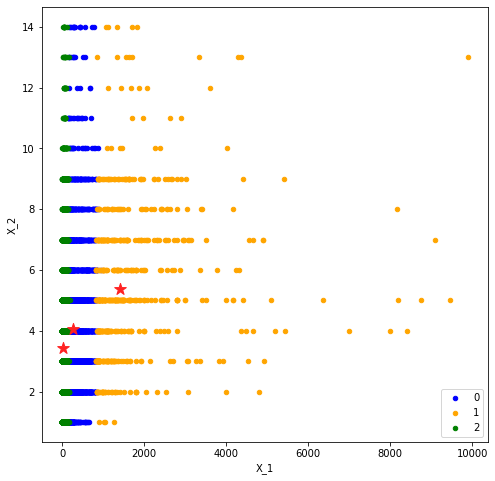

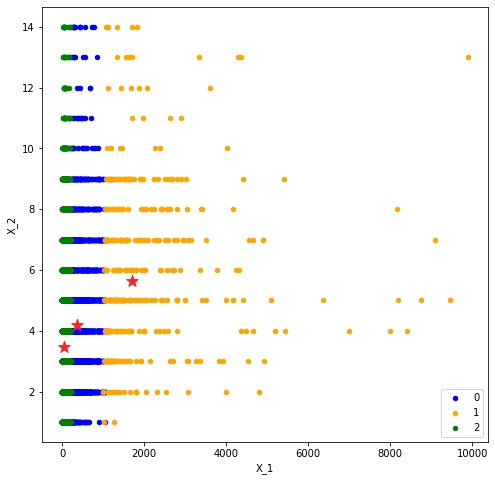

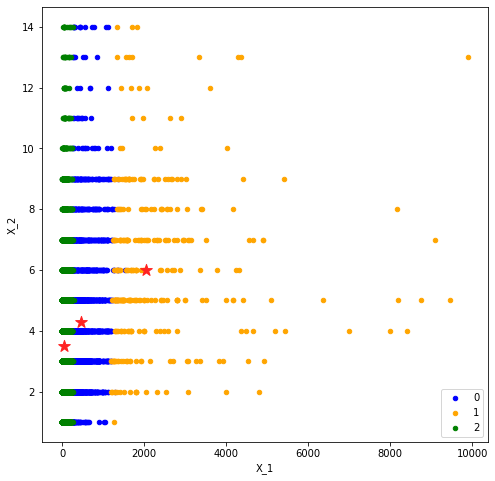

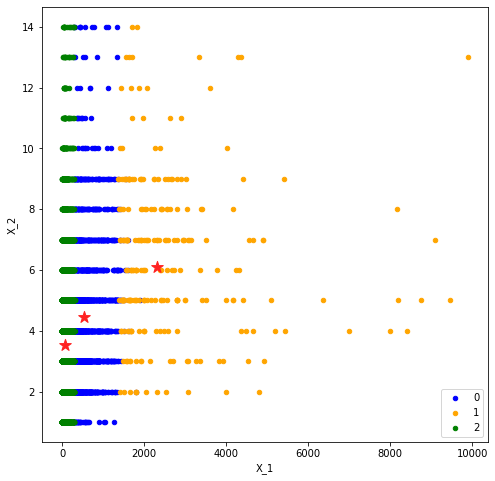

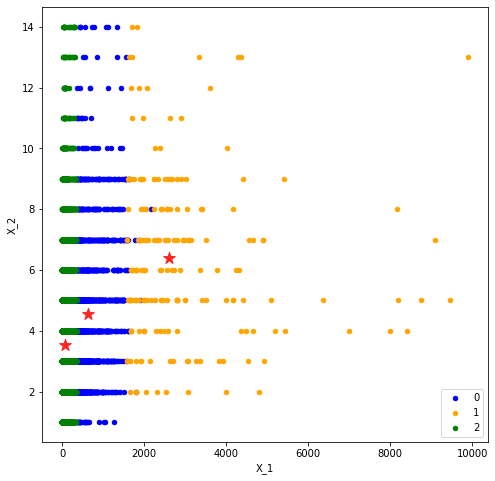

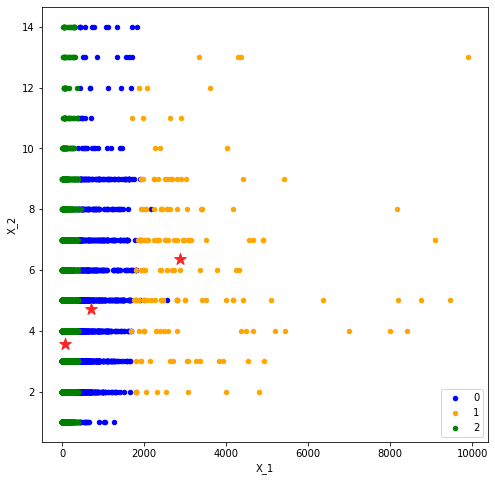

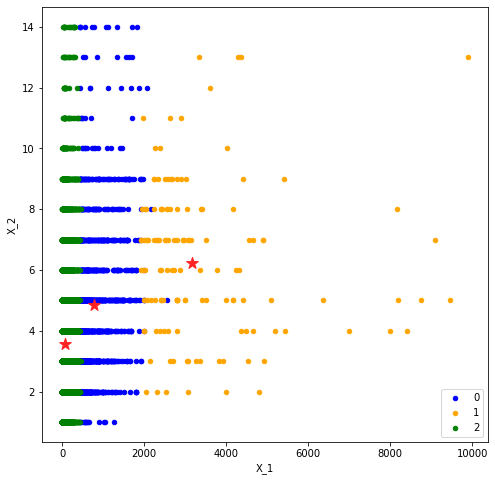

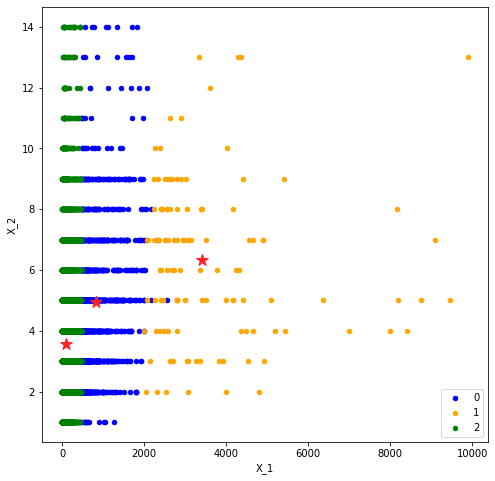

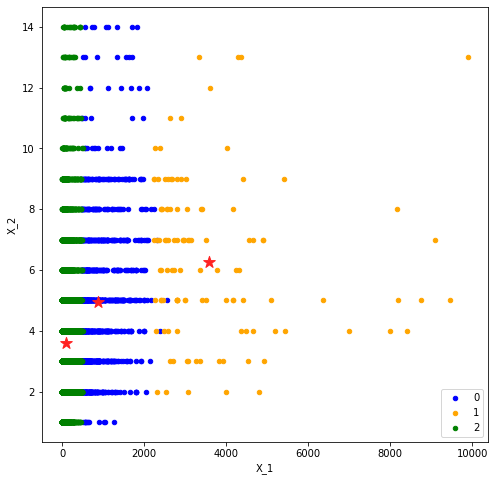

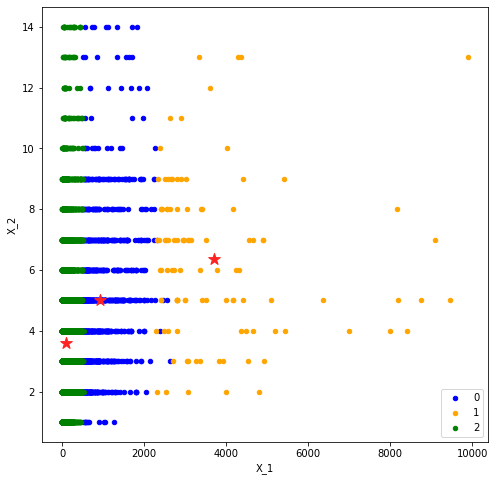

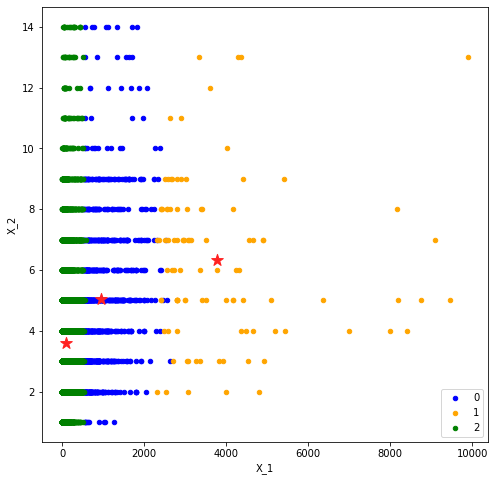

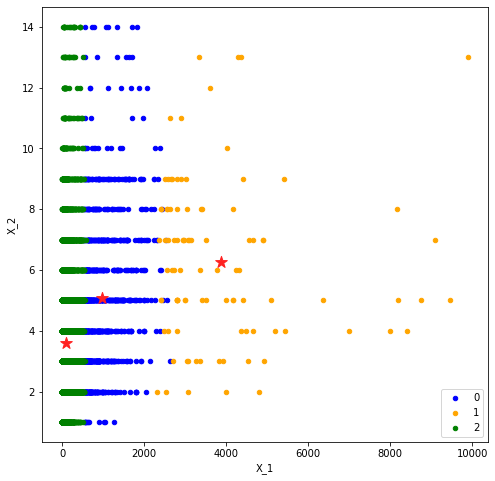

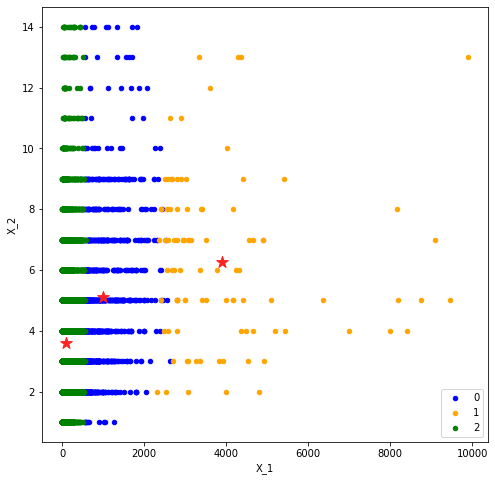

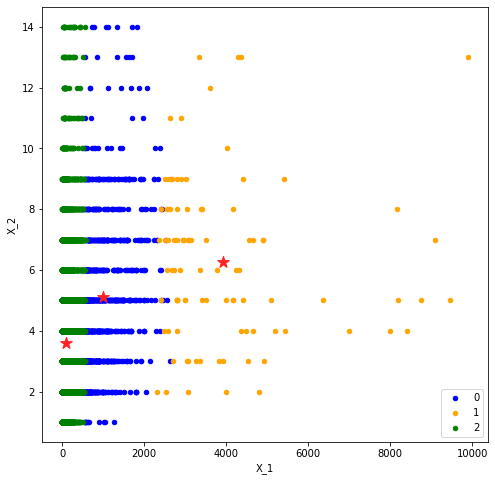

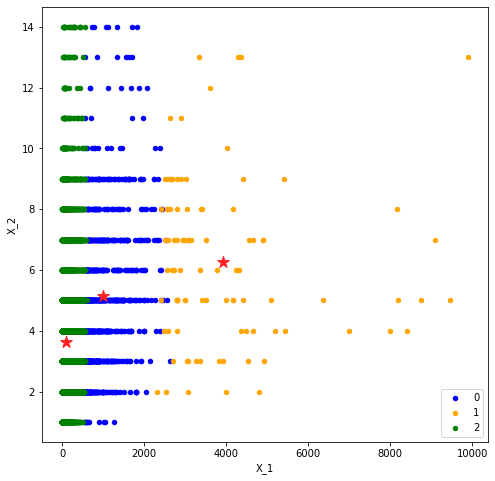

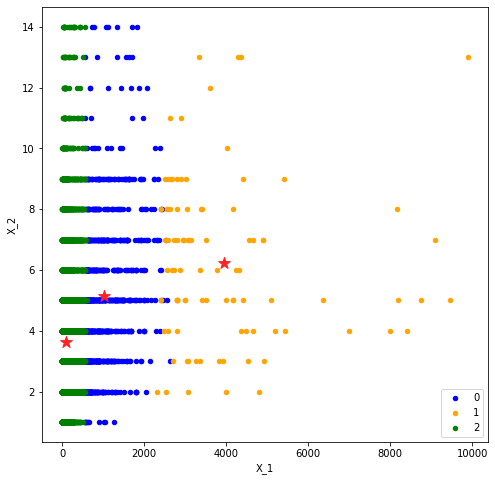

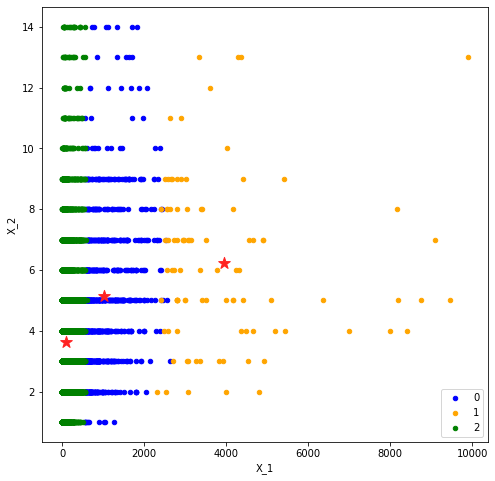

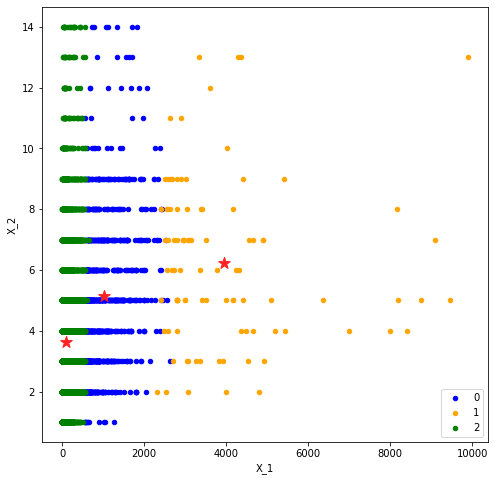

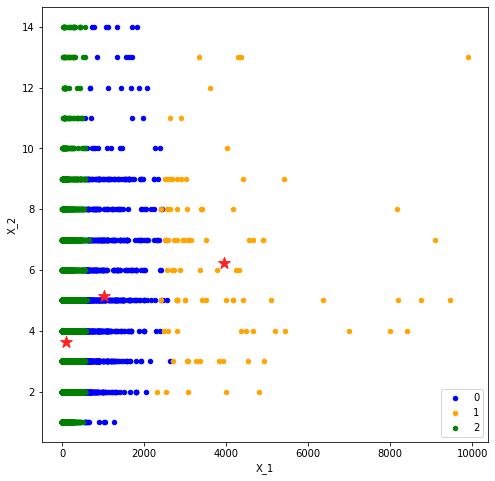

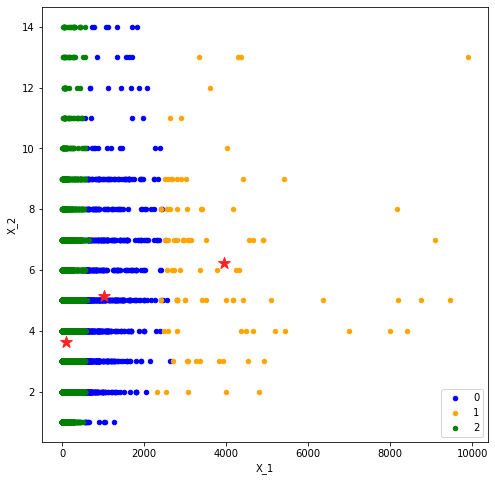

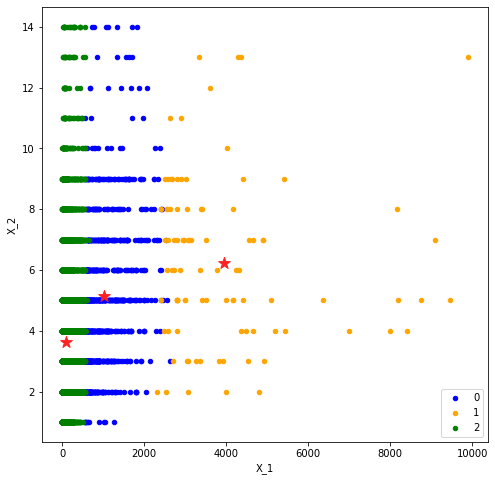

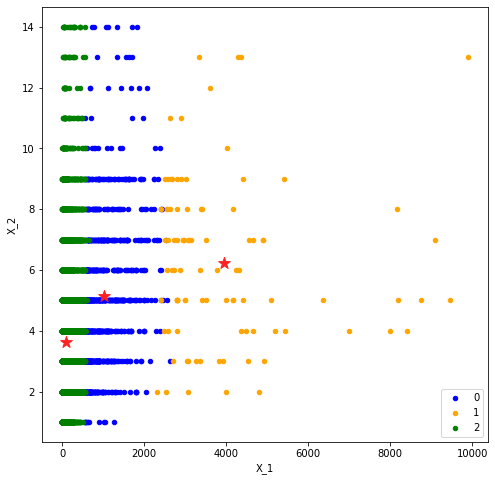

In [38]:
iterasi, klaster, pusat_klaster = k_means(3, data_used)

**Menyimpan label klaster yang telah dibuat pada kolom 'klaster' di dataset yang sama**

In [39]:
data_klasterisasi=data_used
data_klasterisasi

,sales,quantity,profit,label
0,261.9600,2,41.9136,2
1,731.9400,3,219.5820,0
2,14.6200,2,6.8714,2
3,957.5775,5,-383.0310,0
4,22.3680,2,2.5164,2
...,...,...,...,...
9983,25.2480,3,4.1028,2
9984,91.9600,2,15.6332,2
9985,258.5760,2,19.3932,2
9986,29.6000,4,13.3200,2


**Export Dataframe**

In [42]:
data_klasterisasi.to_csv('klasterisasi_data_retail.csv', index=False)